# Routing stack test valhalla

* Date: 2023-01-08
* Issue: <https://github.com/WasteLabs/streamlit_example_routing_app/issues/2>

## Scope

Test the following routing stack:

* <https://github.com/gis-ops/docker-valhalla>: for generating the tile file
* <https://github.com/gis-ops/pyvalhalla>: to interact with it
* <https://github.com/VROOM-Project/pyvroom>: for routing optimisation

## Pre-setup

Run the following to setup Valhalla with the example data:

```bash
docker run -dt --name valhalla_gis-ops -p 8002:8002 -v $PWD/custom_files:/custom_files -e tile_urls=https://download.bbbike.org/osm/bbbike/Montreal/Montreal.osm.pbf gisops/valhalla:latest
```

Then cope to the generated tile file to a convenient project location such as `data/primary`. You can also rename it here.

## Imports and jupyter setup

In [3]:
%load_ext kedro.extras.extensions.ipython
%reload_kedro

catalog = context.catalog
params = context.params
credentials = context._get_config_credentials()

[01/08/23 12:32:00] WARNING  /Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv ]8;id=583817;file:///Users/ejwillemse/.pyenv/versions/3.10.8/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=576033;file:///Users/ejwillemse/.pyenv/versions/3.10.8/lib/python3.10/warnings.py#109\109]8;;\
                             /lib/python3.10/site-packages/kedro/extras/extensions/ipython.py:18:                  
                             DeprecationWarning: kedro.extras.extensions.ipython should be accessed                
                             only using the alias kedro.ipython. The unaliased name will be removed                
                             in Kedro 0.19.0.                                                                      
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Resolved project path as:                                              ]8;id=202425;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=110604;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#132\132]8;;\
                             /Users/ejwillemse/dev/dev_research/streamlit_example_routing_app.                     
                             To set a different path, run '%reload_kedro <project_root>'                           

[01/08/23 12:32:01] WARNING  /Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv ]8;id=196419;file:///Users/ejwillemse/.pyenv/versions/3.10.8/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=405342;file:///Users/ejwillemse/.pyenv/versions/3.10.8/lib/python3.10/warnings.py#109\109]8;;\
                             /lib/python3.10/site-packages/kedro/framework/context/context.py:339:                 
                             UserWarning: Credentials not found in your Kedro project config.                      
                             No files found in                                                                     
                             ['/Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/con                
                             f/base',                                                                              
                             '/Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/conf                
                             /local'] matching the glob pattern(s): ['credentials*',                               
                             'credentials*/**', '**/credentials*']                                                 
                               warn(f"Credentials not found in your Kedro project                                  
                             config.\n{str(exc)}")                                                                 
                                                                                                                   

[01/08/23 12:32:02] INFO     Kedro project streamlit_example_routing_app                            ]8;id=480923;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=860067;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#101\101]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=36250;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=79807;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#102\102]8;;\
                             'pipelines'                                                                           

                    INFO     Resolved project path as:                                              ]8;id=108291;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=456681;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#132\132]8;;\
                             /Users/ejwillemse/dev/dev_research/streamlit_example_routing_app.                     
                             To set a different path, run '%reload_kedro <project_root>'                           

[01/08/23 12:32:02] WARNING  /Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv ]8;id=272568;file:///Users/ejwillemse/.pyenv/versions/3.10.8/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=232799;file:///Users/ejwillemse/.pyenv/versions/3.10.8/lib/python3.10/warnings.py#109\109]8;;\
                             /lib/python3.10/site-packages/kedro/framework/context/context.py:339:                 
                             UserWarning: Credentials not found in your Kedro project config.                      
                             No files found in                                                                     
                             ['/Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/con                
                             f/base',                                                                              
                             '/Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/conf                
                             /local'] matching the glob pattern(s): ['credentials*',                               
                             'credentials*/**', '**/credentials*']                                                 
                               warn(f"Credentials not found in your Kedro project                                  
                             config.\n{str(exc)}")                                                                 
                                                                                                                   

                    INFO     Kedro project streamlit_example_routing_app                            ]8;id=291657;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=124432;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#101\101]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=329007;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=114885;file:///Users/ejwillemse/dev/dev_research/streamlit_example_routing_app/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#102\102]8;;\
                             'pipelines'                                                                           

In [9]:
# Imports / Configs / Global vars

# Import of native python tools
import os
import json
from functools import reduce

# Import of base ML stack libs
import numpy as np
import sklearn as sc

# Logging configuraiton
import logging
logging.basicConfig(format='[ %(asctime)s ][ %(levelname)s ]: %(message)s', datefmt='%m/%d/%Y %I:%M:%S %p')
logger = logging.getLogger()
logger.setLevel(logging.INFO)


# Ipython configs
from IPython.core.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
display(HTML("<style>.container { width:100% !important; }</style>"))
InteractiveShell.ast_node_interactivity = 'all'

# Pandas configs
import pandas as pd
pd.options.display.max_rows = 350
pd.options.display.max_columns = 250

# Jupyter configs
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

# GLOBAL VARS
from pathlib import Path
import sys
PROJECT_DIR = str(context.project_path) #os.getcwd().rsplit('/', 1)[0]

if PROJECT_DIR not in sys.path:
    sys.path.append(PROJECT_DIR)

os.chdir(PROJECT_DIR)

[01/08/23 12:33:39] WARNING  /var/folders/dy/_xqj_wpj3jl0lgk31f6ytns00000gp/T/ipykernel_62564/37097 ]8;id=141971;file:///Users/ejwillemse/.pyenv/versions/3.10.8/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=319179;file:///Users/ejwillemse/.pyenv/versions/3.10.8/lib/python3.10/warnings.py#109\109]8;;\
                             46199.py:20: DeprecationWarning: Importing display from                               
                             IPython.core.display is deprecated since IPython 7.14, please import                  
                             from IPython display                                                                  
                               from IPython.core.display import display, HTML                                      
                                                                                                                   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Test valhala and routingpy

Gt a local instance running at localhost <http://localhost:8002/>. See pre-setup.


### Get test data



In [10]:
import plotly.express as px


def load_transform_data():
    """Load data and do some basic transformation. The `st.experimental_singleton`
    decorator prevents the data from being continously reloaded.
    """
    RENAME_COLUMNS = {
        "car_hours": "demand",
        "centroid_lat": "latitude",
        "centroid_lon": "longitude",
    }
    COLUMN_ORDER = [
        "route_id",
        "stop_id",
        "demand",
        "duration",
        "latitude",
        "longitude",
    ]
    data = px.data.carshare()
    data = (
        data.assign(
            route_id=data["peak_hour"],
            duration=data.index,
        )
        .sort_values(["route_id"])
        .assign(stop_id=np.arange(0, data.shape[0]))
        .rename(columns=RENAME_COLUMNS)
    )[COLUMN_ORDER]
    skill_mapping = {"cycling-electric": range(0, 10), "driving-car": range(10, data.shape[0])}
    for skill in skill_mapping:
        data.loc[data["route_id"].isin(skill_mapping[skill]), "skill"] = skill

    return data

In [11]:
stop_data = load_transform_data()
stop_data

,route_id,stop_id,demand,duration,latitude,longitude,skill
121,0,0,1414.916667,121,45.485231,-73.617825,cycling-electric
223,0,1,1019.750000,223,45.573420,-73.632773,cycling-electric
74,0,2,1322.333333,74,45.607516,-73.513756,cycling-electric
167,0,3,342.666667,167,45.570596,-73.528281,cycling-electric
70,0,4,627.416667,70,45.573831,-73.604143,cycling-electric
102,0,5,1315.666667,102,45.596546,-73.525934,cycling-electric
65,0,6,1019.000000,65,45.514053,-73.632823,cycling-electric
18,0,7,670.750000,18,45.609668,-73.540232,cycling-electric
61,0,8,630.750000,61,45.542824,-73.539783,cycling-electric
192,0,9,538.750000,192,45.525676,-73.590037,cycling-electric


## Setup local valhalla

In [25]:
from valhalla import Actor, get_config, get_help
from valhalla.utils import decode_polyline

import geopandas as gpd
from shapely.geometry import LineString, Polygon, Point
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import contextily as cx

BASEMAP_SOURCE = cx.providers.CartoDB.VoyagerNoLabels
# generate configuration

print(get_help()["service_limits"]["auto"]["max_distance"])

Maximum b-line distance between all locations in meters


## Simple test

### Directions

2023/01/08 13:59:01.287866 [INFO] Tile extract successfully loaded with tile count: 14
2023/01/08 13:59:01.288206 [WARN] (stat): /data/valhalla/traffic.tar No such file or directory
2023/01/08 13:59:01.288212 [WARN] Traffic tile extract could not be loaded
2023/01/08 13:59:01.357058 [INFO] algorithm::bidirectional_a*
2023/01/08 13:59:01.394187 [INFO] algorithm::bidirectional_a*
2023/01/08 13:59:01.417885 [INFO] algorithm::bidirectional_a*
2023/01/08 13:59:01.425751 [INFO] algorithm::bidirectional_a*
2023/01/08 13:59:01.443922 [INFO] algorithm::bidirectional_a*
2023/01/08 13:59:01.466533 [INFO] algorithm::bidirectional_a*
2023/01/08 13:59:01.500112 [INFO] algorithm::bidirectional_a*
2023/01/08 13:59:01.530417 [INFO] algorithm::bidirectional_a*
2023/01/08 13:59:01.544171 [INFO] algorithm::bidirectional_a*


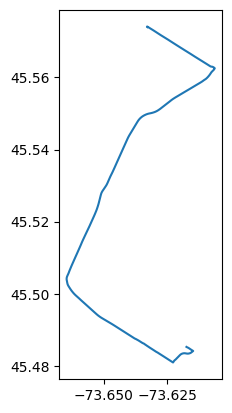

In [91]:
config = get_config(tile_extract='data/03_primary/valhalla_tiles_montreal.tar', verbose=True)
actor = Actor(config)
test_route = stop_data.iloc[:10].apply(lambda x: [x["longitude"], x["latitude"]], axis=1).tolist()
query = {"locations": [{"lat": y, "lon": x} for x,y in test_route], "costing": "auto"}
route = actor.route(query)

data = []
geoms = []

geom = decode_polyline(route["trip"]["legs"][0]["shape"])
duration = route["trip"]["legs"][0]["summary"]["time"]
distance = route["trip"]["legs"][0]["summary"]["length"]
data.append({"duration": duration / 60, "distance": distance, "index": 0})
geoms.append(LineString(geom))

routes = gpd.GeoDataFrame(data=data, geometry=geoms, crs="EPSG:4326").set_index("index")
routes.plot()

### Matrix

We change default matrix calc values to allow larger matrices to be loaded (this process is slow with Valhalla). Just do a `config` to see what can be changed. And use `get_help` to understand them a bit better.

In [92]:
# load the actor and change service limits to all locations

config = get_config(tile_extract='data/03_primary/valhalla_tiles_montreal.tar', verbose=True)
config["service_limits"]["auto"]["max_matrix_location_pairs"] = stop_data.shape[0] * stop_data.shape[0]  # change the defaul
actor = Actor(config)

2023/01/08 13:59:31.821770 [INFO] Tile extract successfully loaded with tile count: 14
2023/01/08 13:59:31.822253 [WARN] (stat): /data/valhalla/traffic.tar No such file or directory
2023/01/08 13:59:31.822262 [WARN] Traffic tile extract could not be loaded


In [93]:
# get cost matrix (it takes a while...)

test_points = stop_data.apply(
    lambda x: [x["longitude"], x["latitude"]], axis=1
).tolist()

query = {"sources": [{"lat": y, "lon": x} for x,y in test_points], "targets": [{"lat": y, "lon": x} for x,y in test_points], "costing": "auto", "metrics": ["distance", "duration"]}
matrix = actor.matrix(query)

2023/01/08 13:59:44.187221 [WARN] Local index 8 exceeds max value of 7, returning heading of 0
2023/01/08 13:59:44.187242 [WARN] Local index 9 exceeds max value of 7, returning heading of 0
2023/01/08 13:59:44.187246 [WARN] Local index 10 exceeds max value of 7, returning heading of 0
2023/01/08 13:59:44.187250 [WARN] Local index 11 exceeds max value of 7, returning heading of 0


In [94]:
# convert into numpy matrix

import numpy as np

matrix.keys()

time_matrix = np.full([len(test_points), len(test_points)], -1)
distance_matrix = np.full([len(test_points), len(test_points)], -1)

for sources in matrix["sources_to_targets"]:
    for destination in sources:
        distance_matrix[destination['from_index'], destination['to_index']] = destination["distance"]
        time_matrix[destination['from_index'], destination['to_index']] = destination["time"]

dict_keys(['sources', 'units', 'targets', 'sources_to_targets'])

In [84]:
time_matrix.min()
distance_matrix.min()

time_matrix.mean()
distance_matrix.mean()

0

0

687.7873743971871

7.9332107546652475

{
    'auto': {
        'max_distance': 'Maximum b-line distance between all locations in meters',
        'max_locations': 'Maximum number of input locations',
        'max_matrix_distance': 'Maximum b-line distance between 2 most distant locations in meters for a matrix',
        'max_matrix_location_pairs': 'Maximum number of routes computed with the matrix, e.g. 2500 = 50:50 or 1:2500'
    },
    'bus': {
        'max_distance': 'Maximum b-line distance between all locations in meters',
        'max_locations': 'Maximum number of input locations',
        'max_matrix_distance': 'Maximum b-line distance between 2 most distant locations in meters for a matrix',
        'max_matrix_location_pairs': 'Maximum number of routes computed with the matrix, e.g. 2500 = 50:50 or 1:2500'
    },
    'taxi': {
        'max_distance': 'Maximum b-line distance between all locations in meters',
        'max_locations': 'Maximum number of input locations',
        'max_matrix_distance': 'Maximum b-line distance between 2 most distant locations in meters for a matrix',
        'max_matrix_location_pairs': 'Maximum number of routes computed with the matrix, e.g. 2500 = 50:50 or 1:2500'
    },
    'pedestrian': {
        'max_distance': 'Maximum b-line distance between all locations in meters',
        'max_locations': 'Maximum number of input locations',
        'max_matrix_distance': 'Maximum b-line distance between 2 most distant locations in meters for a matrix',
        'max_matrix_location_pairs': 'Maximum number of routes computed with the matrix, e.g. 2500 = 50:50 or 1:2500',
        'min_transit_walking_distance': 'TODO: minimum distance you must walk to a station',
        'max_transit_walking_distance': 'Maximum distance allowed for walking when using transit'
    },
    'motor_scooter': {
        'max_distance': 'Maximum b-line distance between all locations in meters',
        'max_locations': 'Maximum number of input locations',
        'max_matrix_distance': 'Maximum b-line distance between 2 most distant locations in meters for a matrix',
        'max_matrix_location_pairs': 'Maximum number of routes computed with the matrix, e.g. 2500 = 50:50 or 1:2500'
    },
    'motorcycle': {
        'max_distance': 'Maximum b-line distance between all locations in meters',
        'max_locations': 'Maximum number of input locations',
        'max_matrix_distance': 'Maximum b-line distance between 2 most distant locations in meters for a matrix',
        'max_matrix_location_pairs': 'Maximum number of routes computed with the matrix, e.g. 2500 = 50:50 or 1:2500'
    },
    'bicycle': {
        'max_distance': 'Maximum b-line distance between all locations in meters',
        'max_locations': 'Maximum number of input locations',
        'max_matrix_distance': 'Maximum b-line distance between 2 most distant locations in meters for a matrix',
        'max_matrix_location_pairs': 'Maximum number of routes computed with the matrix, e.g. 2500 = 50:50 or 1:2500'
    },
    'multimodal': {
        'max_distance': 'Maximum b-line distance between all locations in meters',
        'max_locations': 'Maximum number of input locations',
        'max_matrix_distance': 'Maximum b-line distance between 2 most distant locations in meters for a matrix',
        'max_matrix_location_pairs': 'Maximum number of routes computed with the matrix, e.g. 2500 = 50:50 or 1:2500'
    },
    'status': {
        'allow_verbose': 'Allow verbose output for the /status endpoint, which can be computationally expensive'
    },
    'transit': {
        'max_distance': 'Maximum b-line distance between all locations in meters',
        'max_locations': 'Maximum number of input locations',
        'max_matrix_distance': 'Maximum b-line distance between 2 most distant locations in meters for a matrix',
        'max_matrix_location_pairs': 'Maximum number of routes computed with the matrix, e.g. 2500 = 50:50 or 1:2500'
    },
    'truck': {
        'max_distance': 'Maximum b-line d

Difference in time between two API calls are interisting.

## Vroom

In [17]:
import vroom
from vroom.input import input


In [18]:
problem_instance = input.Input()

In [19]:
problem_instance.set_durations_matrix(
    profile="car",
    matrix_input=[
        [0, 2104, 197, 1299],
        [2103, 0, 2255, 3152],
        [197, 2256, 0, 1102],
        [1299, 3153, 1102, 0],
    ],
)


In [21]:
problem_instance.add_vehicle(
    [vroom.vehicle.Vehicle(47, start=0, end=0), vroom.vehicle.Vehicle(48, start=2, end=2)]
)


In [23]:
problem_instance.add_job(
    [
        vroom.job.Job(1414, location=0),
        vroom.job.Job(1515, location=1),
        vroom.job.Job(1616, location=2),
        vroom.job.Job(1717, location=3),
    ]
)


In [24]:
solution = problem_instance.solve(exploration_level=5, nb_threads=4)

In [33]:
solution_summary_items = [
    "computing_times",
    "cost",
    "delivery",
    "distance",
    "duration",
    "pickup",
    "priority",
    "service",
    "setup",
    "violations",
    "waiting_time",
]


In [52]:
solution.summary.cost

6411

In [53]:
solution.unassigned

[]

In [54]:
solution.routes

,vehicle_id,type,arrival,duration,setup,service,waiting_time,location_index,id,description
0,47,start,0,0,0,0,0,0,<NA>,
1,47,job,2104,2104,0,0,0,1,1515,
2,47,job,4207,4207,0,0,0,0,1414,
3,47,end,4207,4207,0,0,0,0,<NA>,
4,48,start,0,0,0,0,0,2,<NA>,
5,48,job,1102,1102,0,0,0,3,1717,
6,48,job,2204,2204,0,0,0,2,1616,
7,48,end,2204,2204,0,0,0,2,<NA>,
